# Used Cars Pricing

### Import Data 
You can find the "Automobile Dataset" from the following link: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import piplite
await piplite.install('seaborn')

### Reading the dataset from the URL and adding the related headers

In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [4]:
await download(file_path, "usedcars.csv")
file_name="usedcars.csv"

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
df = pd.read_csv(file_name, names= headers, on_bad_lines='skip')

In [7]:
df.shape

(206, 26)

In [9]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450


As you can see, several question marks appeared in the data frame; those missing values may hinder further analysis.\
We need to identify all those missing values and deal with them. So, we will work with missing values with the following steps:
1. Identify missing data
2. Deal with missing data
3. Correct data format


### Identify and handle missing values


#### Identify missing values
<h4>Convert "?" to NaN</h4>
In the car data set, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.

In [10]:
import numpy as np

# replace "?" to NaN
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. Use the following functions to identify these missing values. You can use two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [11]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, you can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the data set.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    206
Name: symboling, dtype: int64

normalized-losses
False    165
True      41
Name: normalized-losses, dtype: int64

make
False    206
Name: make, dtype: int64

fuel-type
False    206
Name: fuel-type, dtype: int64

aspiration
False    206
Name: aspiration, dtype: int64

num-of-doors
False    204
True       2
Name: num-of-doors, dtype: int64

body-style
False    206
Name: body-style, dtype: int64

drive-wheels
False    206
Name: drive-wheels, dtype: int64

engine-location
False    206
Name: engine-location, dtype: int64

wheel-base
False    206
Name: wheel-base, dtype: int64

length
False    206
Name: length, dtype: int64

width
False    206
Name: width, dtype: int64

height
False    206
Name: height, dtype: int64

curb-weight
False    206
Name: curb-weight, dtype: int64

engine-type
False    206
Name: engine-type, dtype: int64

num-of-cylinders
False    206
Name: num-of-cylinders, dtype: int64

engine-size
False    206
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

### Deal with missing data
<b>Steps of dealing with missing data:</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

You should only drop whole columns if most entries in the column are empty. In the data set, none of the columns are empty enough to drop entirely.
You have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. Apply each method to different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.</li>
        </ul>
    </li>
</ul>


##### Calculate the mean value for the "normalized-losses" column

In [13]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 121.2661111111111


##### Replace "NaN" with mean value in "normalized-losses" column

In [14]:
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

##### Calculate the mean value for the "bore" column

In [15]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.313267326732673


##### Replace "NaN" with the mean value in the "bore" column

In [16]:
df['bore'].replace(np.nan, avg_bore, inplace=True)

##### Calculate the mean value for the "stroke" column

In [17]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
print('Average of Stroke:', avg_stroke)

Average of Stroke: 3.244257425742574


##### Replace "NaN" with the mean value in the "stroke" column

In [18]:
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

##### Calculate the mean value for the "horsepower" column

In [19]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


##### Replace "NaN" with the mean value in the "horsepower" column

In [20]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

##### Calculate the mean value for "peak-rpm" column

In [21]:
avg_peak = df['peak-rpm'].astype('float').mean(axis=0)
print('Average of peak-rpm:', avg_peak)

Average of peak-rpm: 5125.369458128079


##### Replace "NaN" with the mean value in the "peak-rpm" column

In [22]:
df['peak-rpm'].replace(np.nan, avg_peak, inplace=True)

##### Deal with missing values in 'num-of-doors' column

In [23]:
df['num-of-doors'].value_counts()

four    115
two      89
Name: num-of-doors, dtype: int64

You can see that four doors is the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [24]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [25]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finally, drop all rows that do not have price data:

In [26]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,121.266111,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,121.266111,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,121.266111,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450


Now, you have a data set with no missing values

#### Correct Data Format 

In Pandas, you use:
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


In [28]:
df.dtypes

symboling            float64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg          float64
price                 object
dtype: object

<p>As you can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, the numerical values 'bore' and 'stroke' describe the engines, so you should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. You have to convert data types into a proper format for each column using the "astype()" method.</p> 

#### Convert data types to proper format

In [29]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [30]:
df.dtypes

symboling            float64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

## Data Standardization
<p>
You usually collect data from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)
</p>
    
<b>What is standardization?</b>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In your data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>You will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>

<p>Use this formula for unit conversion:<p>
L/100km = 235 / mpg

In [31]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,121,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0
1,3.0,121,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0
2,1.0,121,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500.0
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0


In [32]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3.0,121,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0,11.190476
1,3.0,121,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0,11.190476
2,1.0,121,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500.0,12.368421
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0,9.791667
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0,13.055556


In [33]:
df['highway-L/100km'] = 235/df['highway-mpg']

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3.0,121,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0,11.190476,8.703704
1,3.0,121,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0,11.190476,8.703704
2,1.0,121,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500.0,12.368421,9.038462
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0,9.791667,7.833333
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0,13.055556,10.681818


## Data Normalization

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include 
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li> 
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
To demonstrate normalization, say you want to scale the columns "length", "width" and "height".
</p>

In [34]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

## Binning
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>
<p>In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.</p>

<p>Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>

In [35]:
df['horsepower'] = df['horsepower'].astype(int, copy=True)

Plot the histogram of horsepower to see the distribution of horsepower.

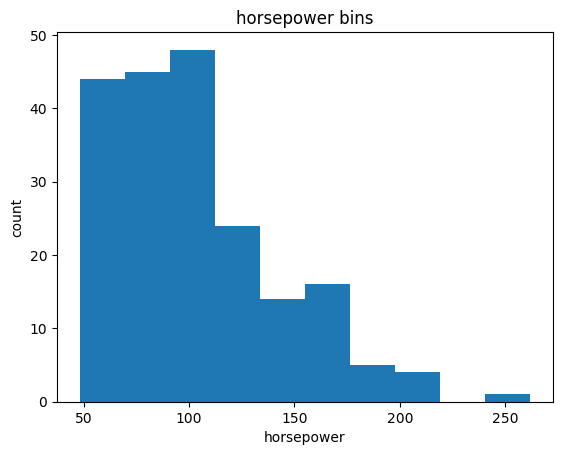

In [36]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins");

In [37]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [38]:
#set group names
group_names = ['Low', 'Medium', 'High']

Apply the function "cut" to determine what each value of `df['horsepower']` belongs to

In [39]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


See the number of vehicles in each bin:


In [40]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

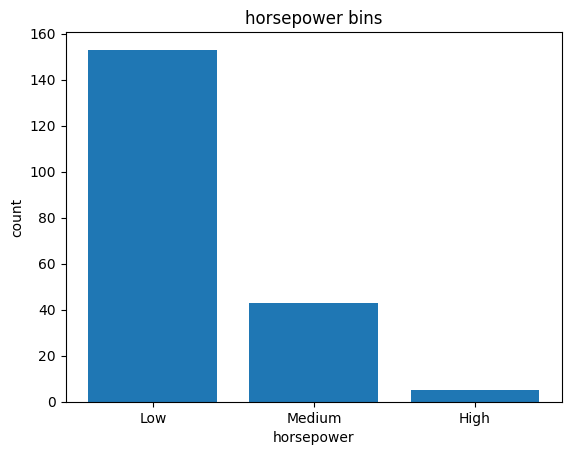

In [41]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#### Bins Visualization

Text(0.5, 1.0, 'horsepower bins')

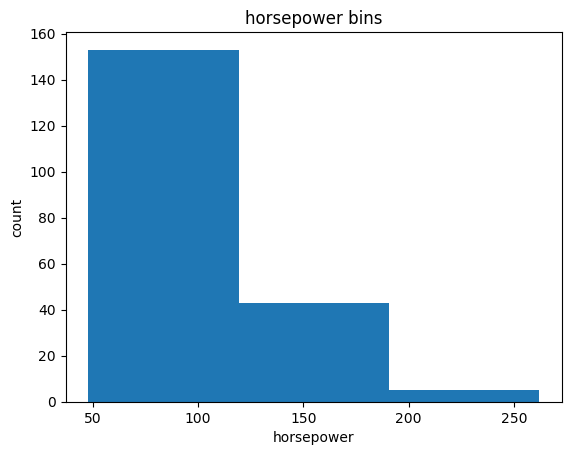

In [42]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Indicator Variable
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why use indicator variables?</b>
<p>
    You use indicator variables so you can use categorical variables for regression analysis.
</p>
<b>Example</b>
<p>
    The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.
</p>

<p>
    Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [43]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable_1":

In [44]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [45]:
# merge data frame 'df' and 'dummy_variable_1'
df = pd.concat([df, dummy_variable_1], axis=1)

#drom original column 'fuel-type' from df 
df.drop('fuel-type', axis=1, inplace=True)

In [46]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3.0,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21.0,27.0,13495.0,11.190476,8.703704,Low,0,1
1,3.0,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21.0,27.0,16500.0,11.190476,8.703704,Low,0,1
2,1.0,121,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19.0,26.0,16500.0,12.368421,9.038462,Medium,0,1
3,2.0,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24.0,30.0,13950.0,9.791667,7.833333,Low,0,1
4,2.0,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18.0,22.0,17450.0,13.055556,10.681818,Low,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.

In [47]:
#get dummies from the column 'aspiration'
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [48]:
#merge dataframe 'df' and 'dummy_variable_2'
df = pd.concat([df, dummy_variable_2], axis=1)

#drop the original column 'aspiration'
df.drop('aspiration', axis=1, inplace= True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3.0,121,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21.0,27.0,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3.0,121,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21.0,27.0,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1.0,121,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19.0,26.0,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2.0,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24.0,30.0,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2.0,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18.0,22.0,17450.0,13.055556,10.681818,Low,0,1,1,0


## Analyzing Individual Feature Patterns Using Visualization

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### How to choose the right visualization method?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [50]:
# list the data types for each column
print(df.dtypes)

symboling             float64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size           float64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg              float64
highway-mpg           float64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
diesel                  uint8
gas                     uint8
std                     uint8
turbo                   uint8
dtype: object


In [51]:
df['peak-rpm'].dtypes

dtype('float64')

We can calculate the correlation between variables of type "int64" or "float64" using the method "corr":

In [52]:
df.corr()

<ipython-input-52-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
symboling,1.000000,0.465247,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.142130,-0.009369,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.465247,1.000000,-0.059331,0.015341,0.083256,-0.373629,0.094572,0.106851,-0.033952,0.052868,...,0.240605,-0.220654,-0.177498,0.128376,0.233472,0.176193,-0.102225,0.102225,0.007469,-0.007469
wheel-base,-0.535987,-0.059331,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493933,0.158423,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.015341,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.609465,0.124249,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.083256,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544974,0.188883,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373629,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.182535,-0.059459,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.094572,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644377,0.167633,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.106851,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.574195,0.206850,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.142130,-0.033952,0.493933,0.609465,0.544974,0.182535,0.644377,0.574195,1.000000,-0.055336,...,-0.269650,-0.580389,-0.589898,0.543162,0.552600,0.557638,0.054864,-0.054864,-0.228379,0.228379
stroke,-0.009369,0.052868,0.158423,0.124249,0.188883,-0.059459,0.167633,0.206850,-0.055336,1.000000,...,-0.064864,-0.033028,-0.033838,0.082285,0.034991,0.046254,0.241294,-0.241294,-0.218559,0.218559


In [53]:
#Correlation between bore, stroke, compression-ratio, and horsepower columns
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055336,0.001498,0.566679
stroke,-0.055336,1.000000,0.188003,0.098011
compression-ratio,0.001498,0.188003,1.000000,-0.214489
horsepower,0.566679,0.098011,-0.214489,1.000000


## Continuous Numerical Variables:
Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.

### Positive Linear Relationship
* `Engine size` is a potential predictor variable of price. Let's find the scatterplot of `"engine-size"` and `"price"`


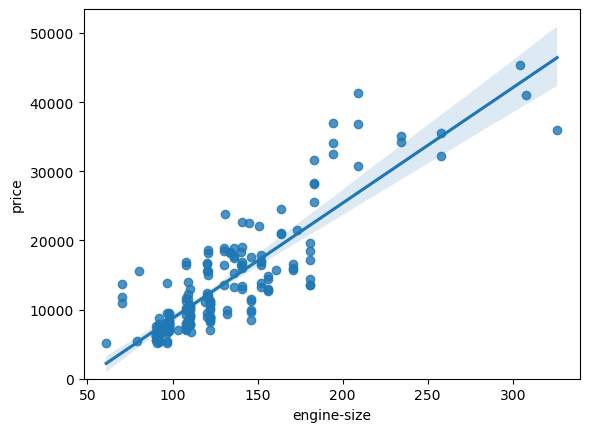

In [54]:

sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,);

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.

In [55]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Negative Linear Relationship
* `Highway mpg` is a potential predictor variable of price. Let's find the scatterplot of `"highway-mpg"` and `"price"`.

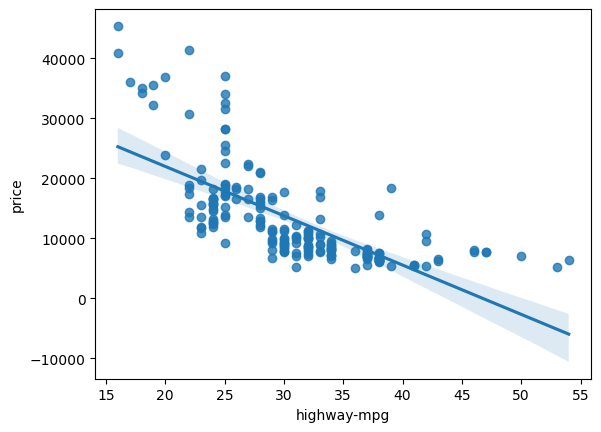

In [56]:
sns.regplot(x='highway-mpg',y='price', data=df);

As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.

In [57]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Weak Linear Relationship
Let's see if "peak-rpm" is a predictor variable of "price".

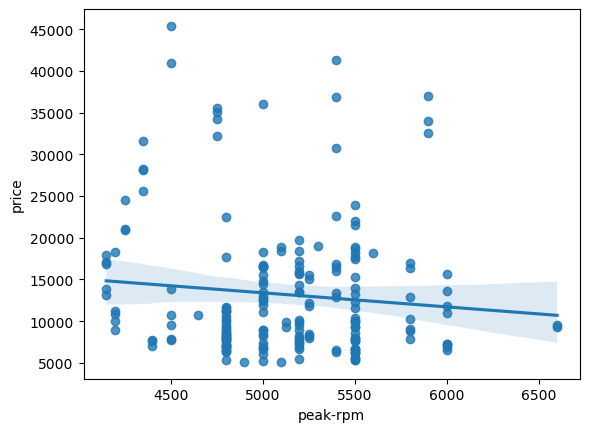

In [58]:
sns.regplot(x='peak-rpm', y='price', data=df);

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.

In [59]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Let's see if `'stroke'` is a predictor variable of 'price'.

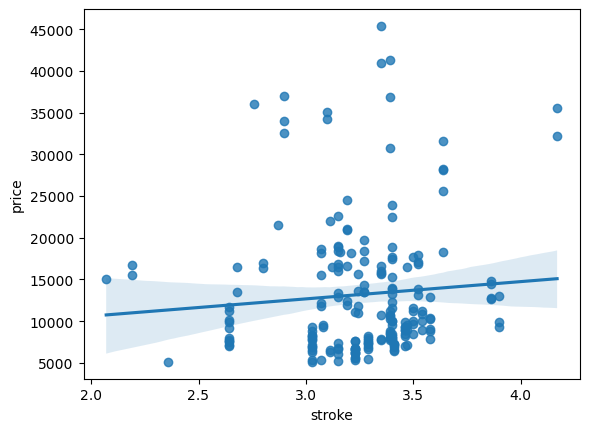

In [60]:
sns.regplot(x='stroke', y='price', data=df);

'Stroke' does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

We can examine the correlation between 'stroke' and 'price' and see it's approximately 0.0822.


In [61]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082285
price,0.082285,1.000000


### Categorical Variables
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.
Let's look at the relationship between `body-style` and `price`.

e".

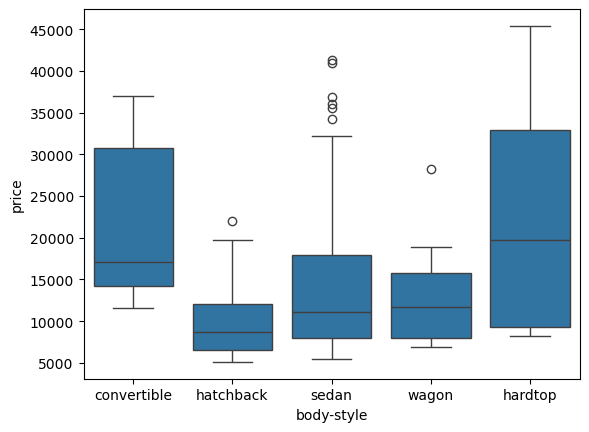

In [62]:
sns.boxplot(x='body-style', y='price', data=df);

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

Let's examine "`engine-location`" and "`price`":

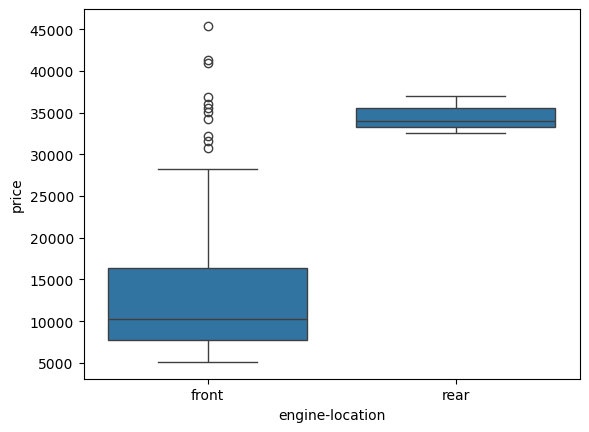

In [63]:
sns.boxplot(x='engine-location', y='price', data=df);

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's examine "`drive-wheels`" and "`price`".

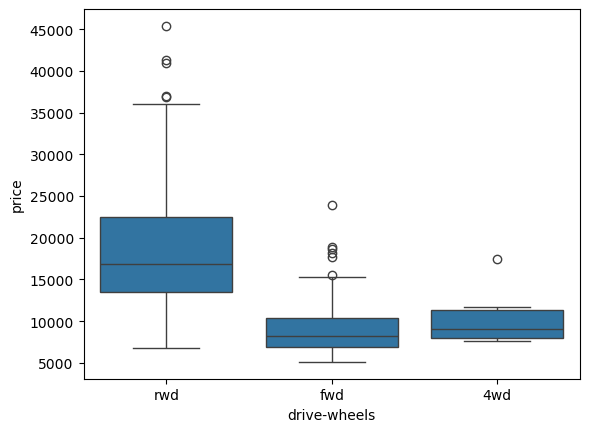

In [64]:
sns.boxplot(x='drive-wheels', y='price', data=df);

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

## Descriptive Statistical Analysis
<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [65]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,121.815920,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330364,3.256652,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.998608,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268083,0.316053,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,121.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [66]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


### Value Counts
<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>


In [67]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a dataframe as follows:

In [68]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.

In [69]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Now let's rename the index to 'drive-wheels':

In [70]:
drive_wheels_counts.index.name = 'drive_wheels'
drive_wheels_counts

,value_counts
drive_wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.

In [74]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


### Basics of Grouping

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

Let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>

In [76]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

In [77]:
df_group_one = df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.

In [78]:
#grouping results
df_group_one = df_group_one.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_group_one

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [79]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to generate a pivot table from the groups.

In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:

In [80]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well

In [81]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [82]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [83]:
import matplotlib.pyplot as plt
%matplotlib inline 

### Visualizing Variables: Drive Wheels and Body Style vs. Price
Use a heat map to visualize the relationship between Body Style vs Price.

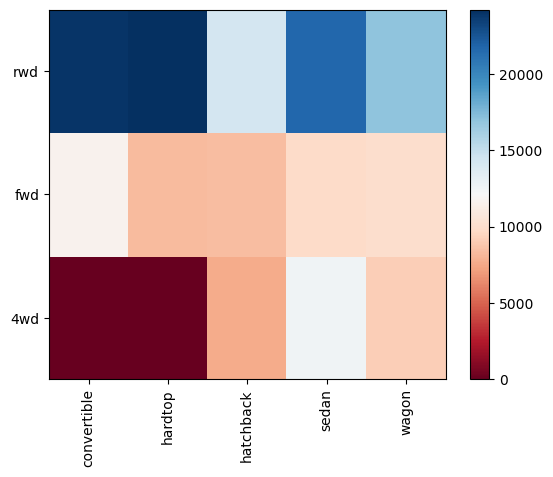

In [86]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

## Correlation and Causation
<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

Pearson Correlation is the default method of the function "corr". We can calculate the Pearson Correlation of the 'int64' or 'float64' variables.

In [87]:
df.corr()

<ipython-input-87-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
symboling,1.000000,0.465247,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.142130,-0.009369,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.465247,1.000000,-0.059331,0.015341,0.083256,-0.373629,0.094572,0.106851,-0.033952,0.052868,...,0.240605,-0.220654,-0.177498,0.128376,0.233472,0.176193,-0.102225,0.102225,0.007469,-0.007469
wheel-base,-0.535987,-0.059331,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493933,0.158423,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.015341,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.609465,0.124249,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.083256,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544974,0.188883,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373629,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.182535,-0.059459,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.094572,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644377,0.167633,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.106851,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.574195,0.206850,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.142130,-0.033952,0.493933,0.609465,0.544974,0.182535,0.644377,0.574195,1.000000,-0.055336,...,-0.269650,-0.580389,-0.589898,0.543162,0.552600,0.557638,0.054864,-0.054864,-0.228379,0.228379
stroke,-0.009369,0.052868,0.158423,0.124249,0.188883,-0.059459,0.167633,0.206850,-0.055336,1.000000,...,-0.064864,-0.033028,-0.033838,0.082285,0.034991,0.046254,0.241294,-0.241294,-0.218559,0.218559


Sometimes we would like to know the significant of the correlation estimate.

<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

We can obtain this information using `"stats"` module in the `"scipy"` library.

In [90]:
from scipy import stats

### Wheel-base vs Price 
Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [92]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef,'with a P-value of P=', p_value)

The Pearson Correlation Coefficient is 0.5846418222655085 with a P-value of P= 8.076488270732338e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>

### Horsepower vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [93]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef,' with a P-values of P=', p_value)

The Pearson Correlation Coefficient is 0.8096068016571051  with a P-values of P= 6.273536270651025e-48


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


### Length vs Price

In [95]:
pearson_coef, p_value = stats.pearsonr(df['length'],df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef,'with a P-values of P=', p_value)

The Pearson Correlation Coefficient is 0.6906283804483643 with a P-values of P= 8.016477466158871e-30


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

### Width vs Price

In [96]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510482062e-38


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-Weight vs Price 


In [97]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.1895772388939654e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

### Engine-Size vs Price

In [98]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455188  with a P-value of P = 9.26549162219582e-64


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

### Bore vs Price

In [99]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431618701907789  with a P-value of P =   8.041094871724472e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>

### City-mpg vs Price

In [100]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844684  with a P-value of P =  2.3211320655672357e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>

### High-mpg vs Price 

In [101]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589532  with a P-value of P =  1.7495471144475574e-31


#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

### Important Variables 
<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>
